In [17]:
import mirrorr_instagram_extractor
from mirrorr_instagram_extractor import InstaUser
from IPython.display import Image
import jsonpickle
import json
import time
import csv
from google.cloud import datastore
import pandas as pd

def db_demo(userid):
    user = InstaUser(userid=userid)
    user.quick_demo()
    print(user.get_info())
    user.download_profile_pic()
    display(Image(user.fileout))    
    user.screenshot_main()
    display(Image(user.fileout))
    user.screenshot_lower()
    time.sleep(0.3)
    user.screenshot_lower()
    display(Image(user.fileout))   
    task = datastore.Entity(datastore_client.key('user_profile'))
    test = json.loads(user.result)
    task.update(test)
    datastore_client.put(task)    

def short_demo(userid):
    user = InstaUser(userid=userid)
    user.quick_demo()
    print(user.get_info())
    user.download_profile_pic()
    display(Image(user.fileout))    
    user.screenshot_main()
    display(Image(user.fileout))
    user.screenshot_lower()
    time.sleep(0.3)
    user.screenshot_lower()
    display(Image(user.fileout))
    

def scrape_list(input_file):
    with open(input_file) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
#             short_demo(row[0])    
            db_demo(row[0])
            
def db_insert(datastore,instauser,kind='user_profile')            :
    task = datastore.Entity(datastore_client.key(kind))
    test = json.loads(instauser.result)
    task.update(test)
    datastore_client.put(task)            

def db_list(datastore_client,kind='user_profile'):    
    query = datastore_client.query(kind=kind)
    results = list(query.fetch())
    return(results)

### Instantiate the Instagram scraper object

In [2]:
tim_user = InstaUser(userid='taylorswift')

This parses the info from the backend

In [3]:
tim_user.quick_demo()

In [4]:
tim_user.followers

'112m'

In [5]:
tim_user.get_info()

'{"date_extracted": "2018-10-14 06:44:06.652343", "userid": "taylorswift", "posts": "236", "followers": "112m", "following": "0", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/81a760c38d68de3b17e5508270a63186/5C5C71BF/t51.2885-19/s150x150/20969376_112654676087652_1378856425261891584_a.jpg"}'

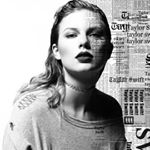

In [6]:
tim_user.download_profile_pic()
Image(tim_user.fileout)

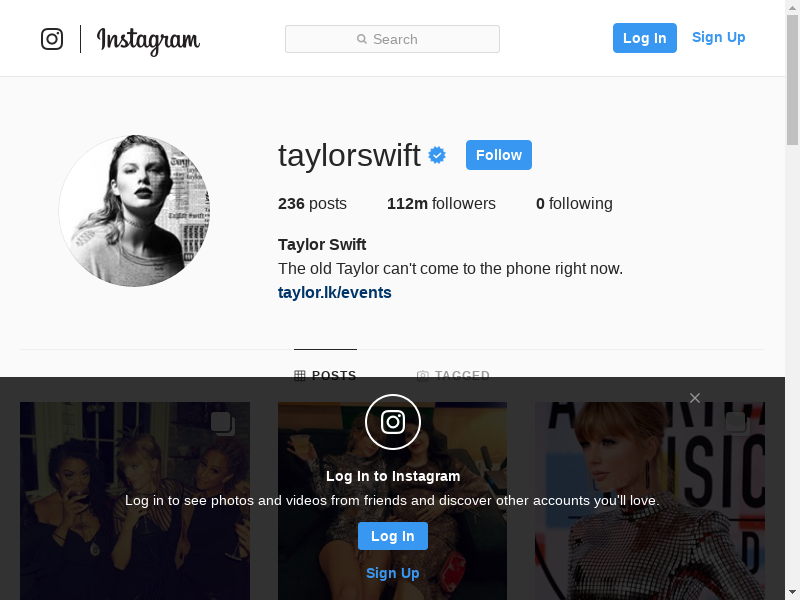

In [7]:
tim_user.screenshot_main()
Image(tim_user.fileout)

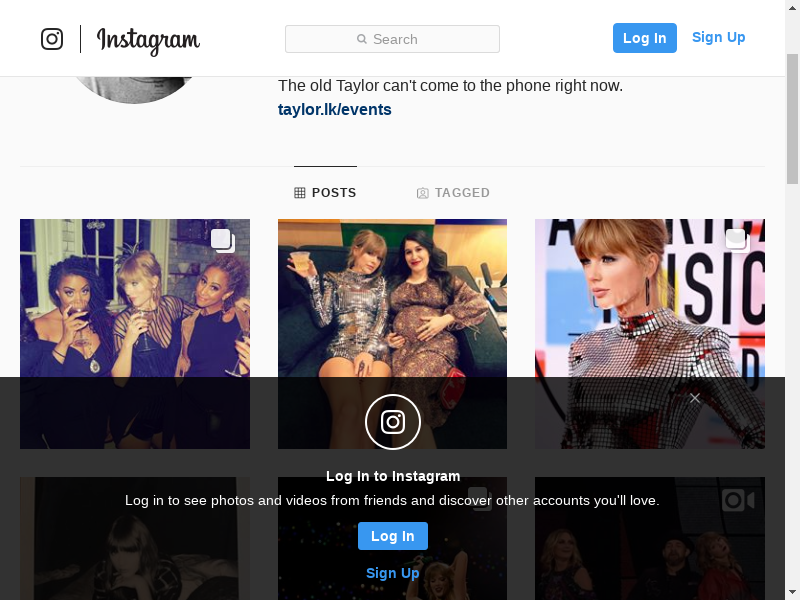

In [8]:
tim_user.screenshot_lower()
Image(tim_user.fileout)

{"date_extracted": "2018-10-12 10:37:27.316775", "userid": "livelovebeirut", "posts": "11,001", "followers": "324k", "following": "592", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/f4d66732ae1e51fc275bcae4d032a40a/5C4DA3A8/t51.2885-19/11821871_699562673481682_730349_a.jpg"}


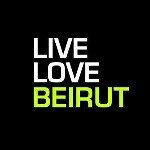

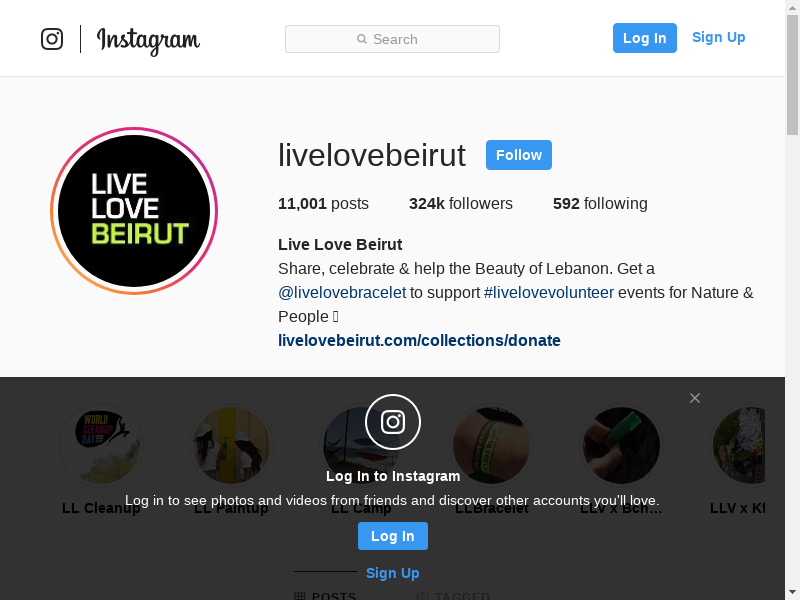

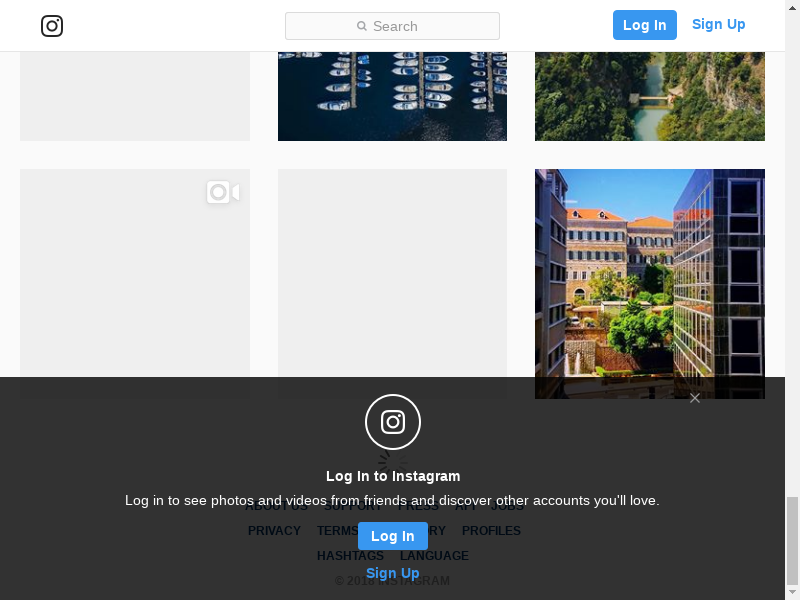

In [9]:
short_demo(userid='livelovebeirut')

{"date_extracted": "2018-10-12 10:37:55.544490", "userid": "wunderingbark", "posts": "38", "followers": "81", "following": "103", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/6902ef55cf623eee7cb68a9e6be76eda/5C61C53E/t51.2885-19/s150x150/13402525_526906604176826_1893344522_a.jpg"}


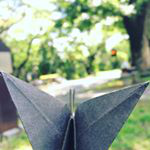

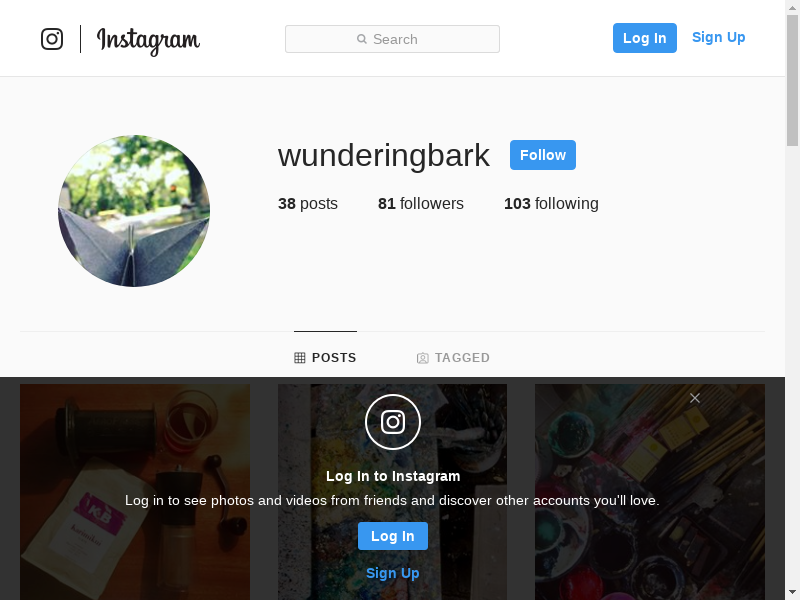

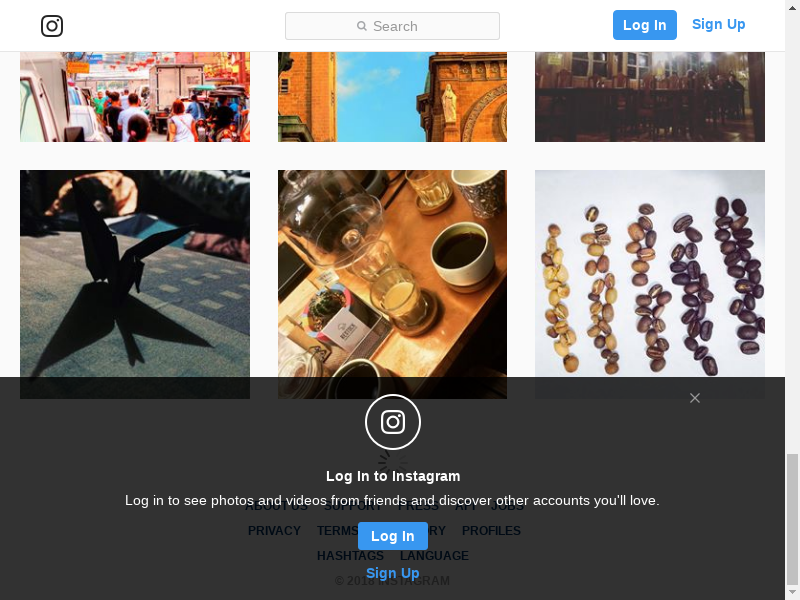

{"date_extracted": "2018-10-12 10:38:00.995826", "userid": "internetoftim", "posts": "39", "followers": "224", "following": "58", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/1783592e02bd4ab825db6631e8054837/5C3F78AB/t51.2885-19/s150x150/17333968_1876464679298542_9042449064951545856_a.jpg"}


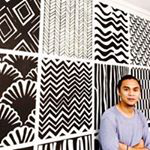

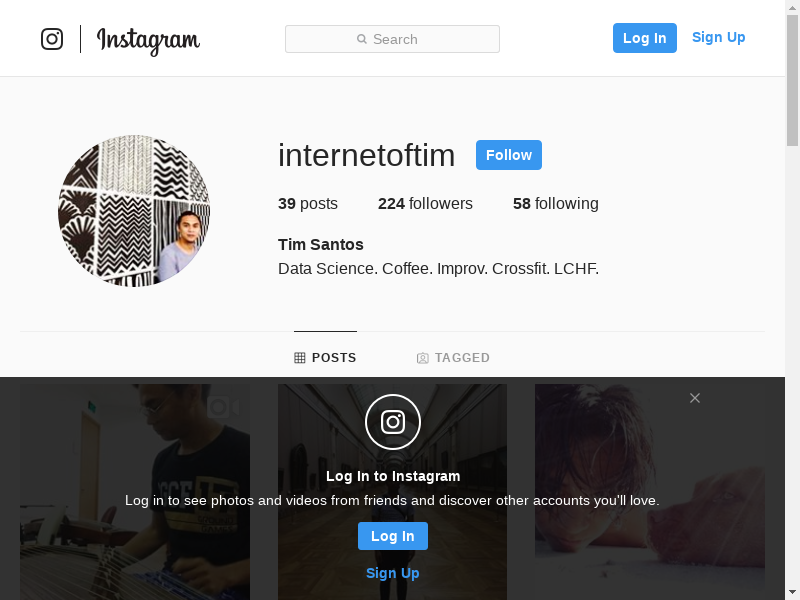

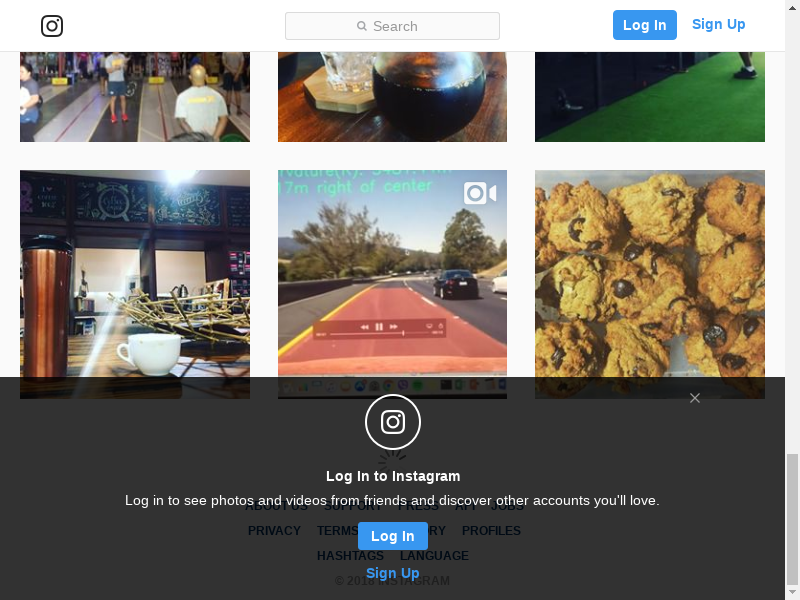

{"date_extracted": "2018-10-12 10:38:06.149105", "userid": "taylorswift", "posts": "236", "followers": "112m", "following": "0", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/81a760c38d68de3b17e5508270a63186/5C5C71BF/t51.2885-19/s150x150/20969376_112654676087652_1378856425261891584_a.jpg"}


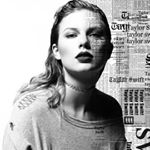

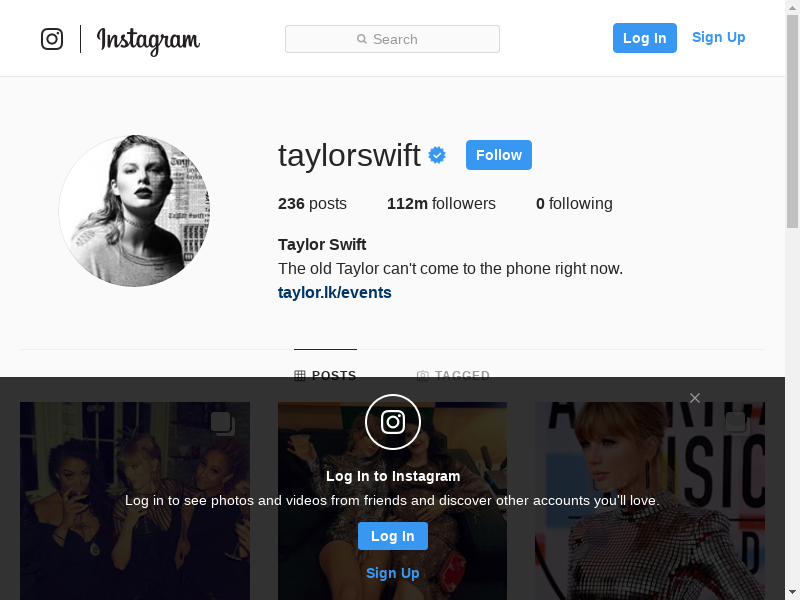

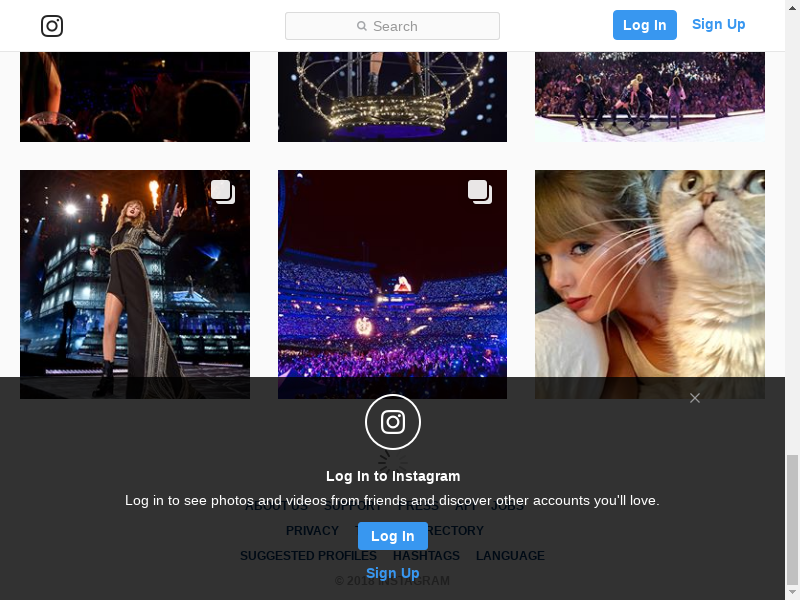

{"date_extracted": "2018-10-12 10:38:11.531528", "userid": "ilovebeirut", "posts": "4", "followers": "8", "following": "0", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/d445bb0b921925b7db4ee08f41260f39/5C4A660E/t51.2885-19/11887160_1479579122362485_153375665_a.jpg"}


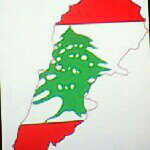

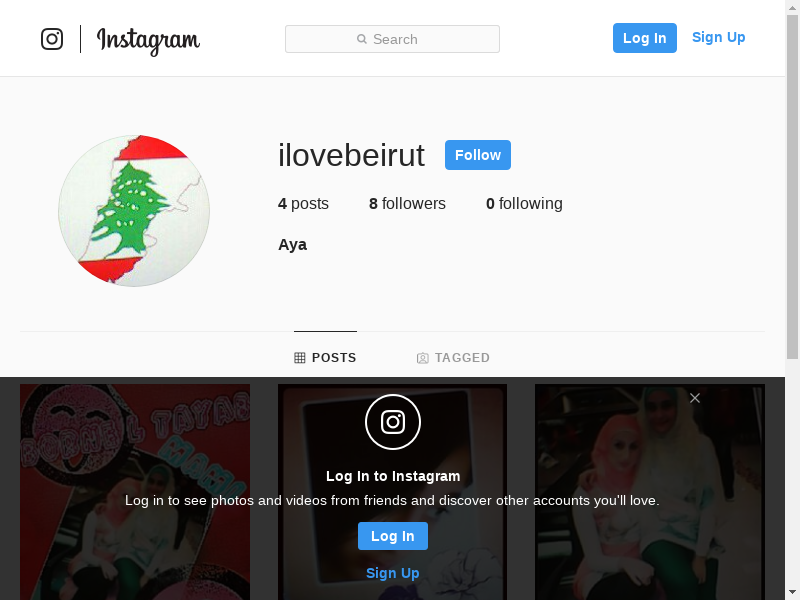

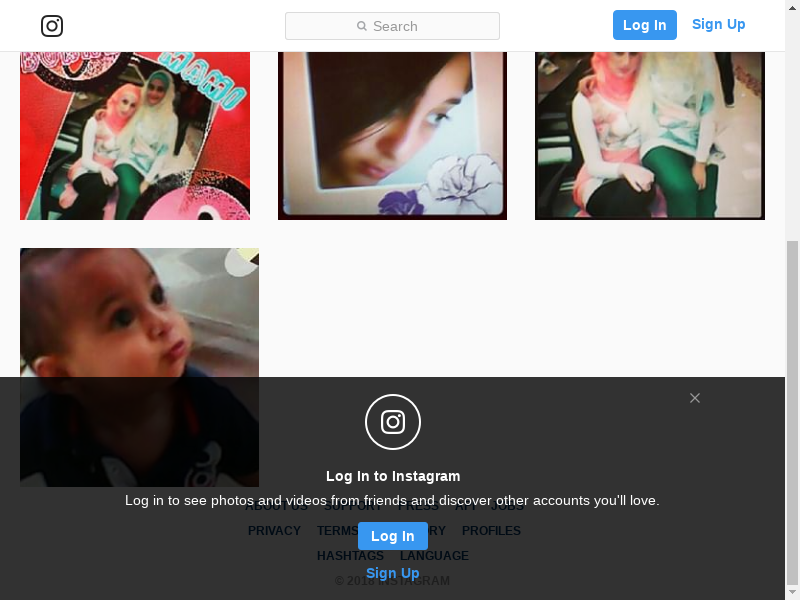

{"date_extracted": "2018-10-12 10:38:16.990809", "userid": "knockoutcrossfit", "posts": "1,374", "followers": "978", "following": "831", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/61636057c160db2b0646323ae711f724/5C44B0E4/t51.2885-19/11351823_614213478721449_1303633718_a.jpg"}


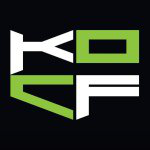

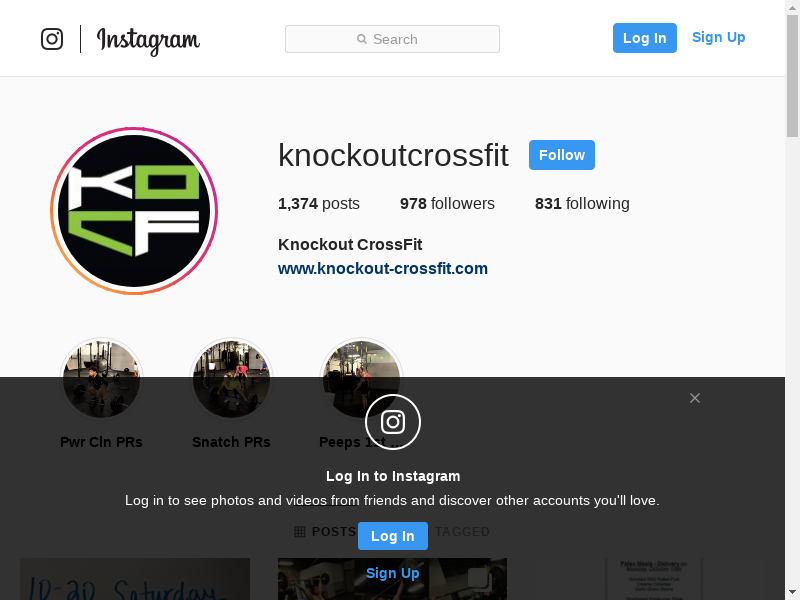

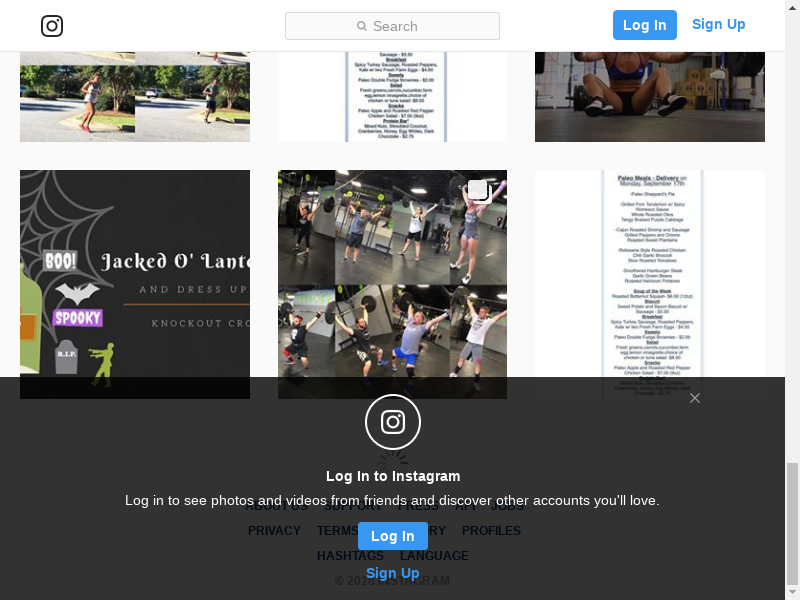

In [10]:
scrape_list('list_insta.csv')

### Demonstrate the API/webservice

Prerequisite: Make sure the server is running (visit Google Cloud)

See the app server : http://35.221.200.146:5000/userid

View another user: gracechong.love

## Demonstrate interaction with Database

Login to Google Datastore



In [7]:
datastore_client = datastore.Client.from_service_account_json(
        '/home/mirroraidev/config.json')


### See what the current database contains

In [8]:
query = datastore_client.query(kind='user_profile')
results = list(query.fetch())
display(results)

[<Entity('user_profile', 5641906755207168) {'profile_pic_uri': 'https://scontent-hkg3-2.cdninstagram.com/vp/81a760c38d68de3b17e5508270a63186/5C5C71BF/t51.2885-19/s150x150/20969376_112654676087652_1378856425261891584_a.jpg', 'userid': 'taylorswift', 'followers': '112m', 'posts': '236', 'date_extracted': '2018-10-12 10:36:42.950425', 'following': '0'}>]

Store a single entry in the database

In [9]:
task = datastore.Entity(datastore_client.key('user_profile'))
test = json.loads(tim_user.result)
task.update(test)
datastore_client.put(task)

See the updated entry

In [13]:
query = datastore_client.query(kind='user_profile')
results = list(query.fetch())
results

[<Entity('user_profile', 5636953047302144) {'profile_pic_uri': 'https://scontent-hkg3-2.cdninstagram.com/vp/81a760c38d68de3b17e5508270a63186/5C5C71BF/t51.2885-19/s150x150/20969376_112654676087652_1378856425261891584_a.jpg', 'userid': 'taylorswift', 'followers': '112m', 'posts': '236', 'date_extracted': '2018-10-14 06:44:06.652343', 'following': '0'}>,
 <Entity('user_profile', 5641906755207168) {'userid': 'taylorswift', 'followers': '112m', 'posts': '236', 'date_extracted': '2018-10-12 10:36:42.950425', 'following': '0', 'profile_pic_uri': 'https://scontent-hkg3-2.cdninstagram.com/vp/81a760c38d68de3b17e5508270a63186/5C5C71BF/t51.2885-19/s150x150/20969376_112654676087652_1378856425261891584_a.jpg'}>]

## Scrape from a list of influencers

In [11]:
test = pd.read_csv('list_insta.csv')
test

wunderingbark
0     internetoftim
1       taylorswift
2       ilovebeirut
3  knockoutcrossfit

{"date_extracted": "2018-10-14 06:47:16.716029", "userid": "wunderingbark", "posts": "38", "followers": "82", "following": "103", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/6902ef55cf623eee7cb68a9e6be76eda/5C61C53E/t51.2885-19/s150x150/13402525_526906604176826_1893344522_a.jpg"}


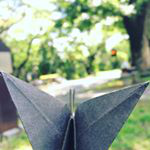

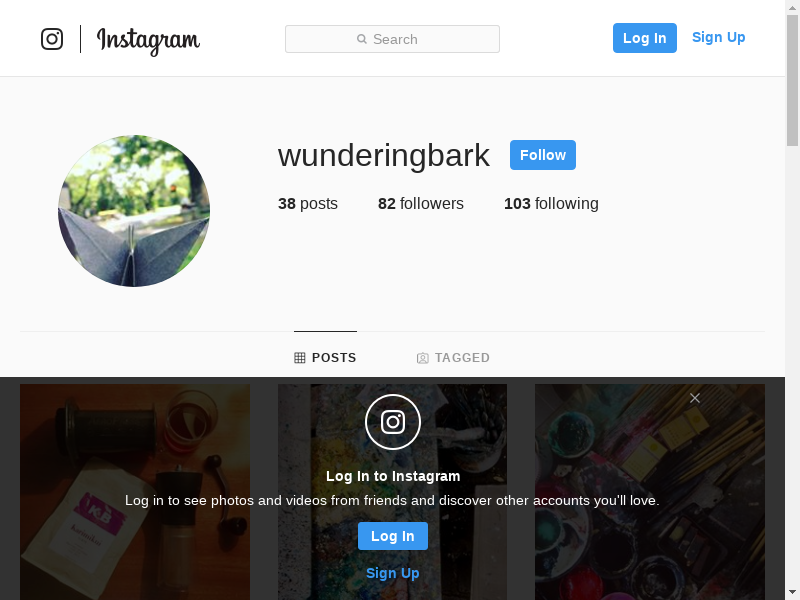

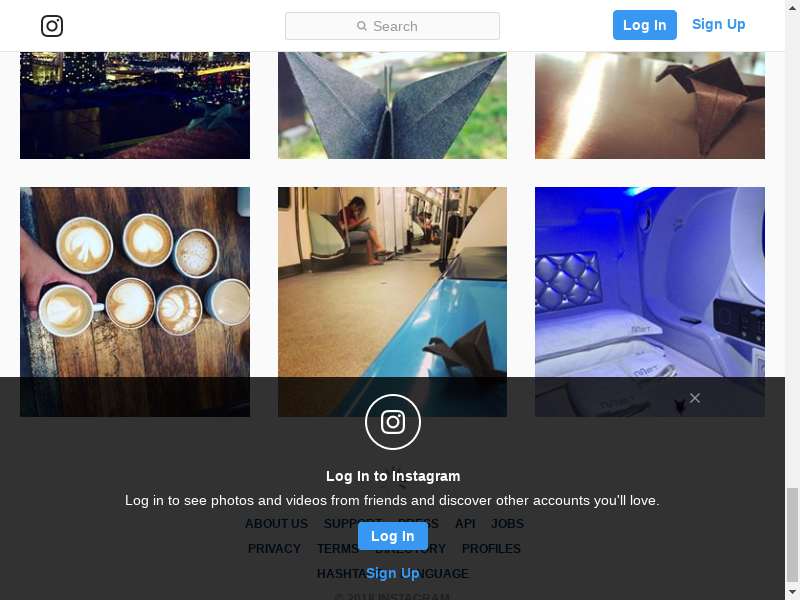

{"date_extracted": "2018-10-14 06:47:22.953688", "userid": "internetoftim", "posts": "39", "followers": "225", "following": "58", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/1783592e02bd4ab825db6631e8054837/5C3F78AB/t51.2885-19/s150x150/17333968_1876464679298542_9042449064951545856_a.jpg"}


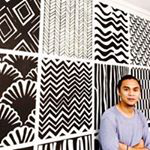

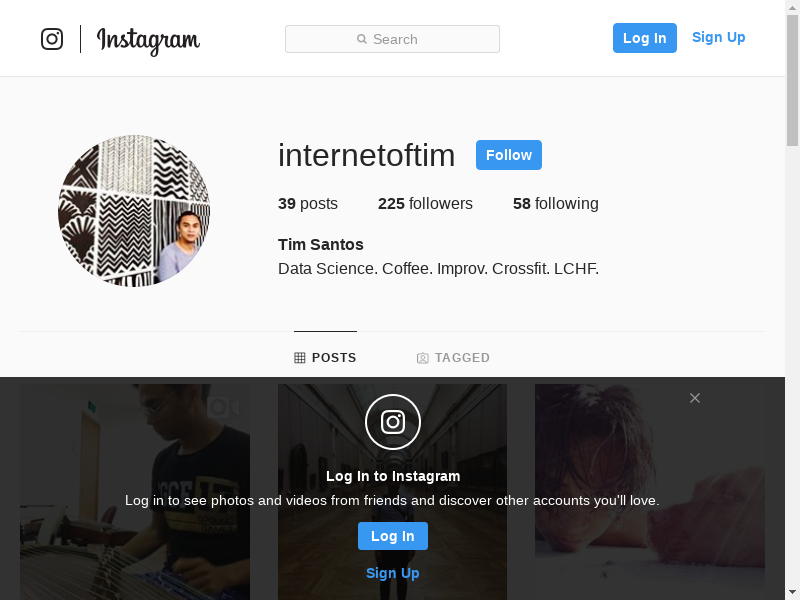

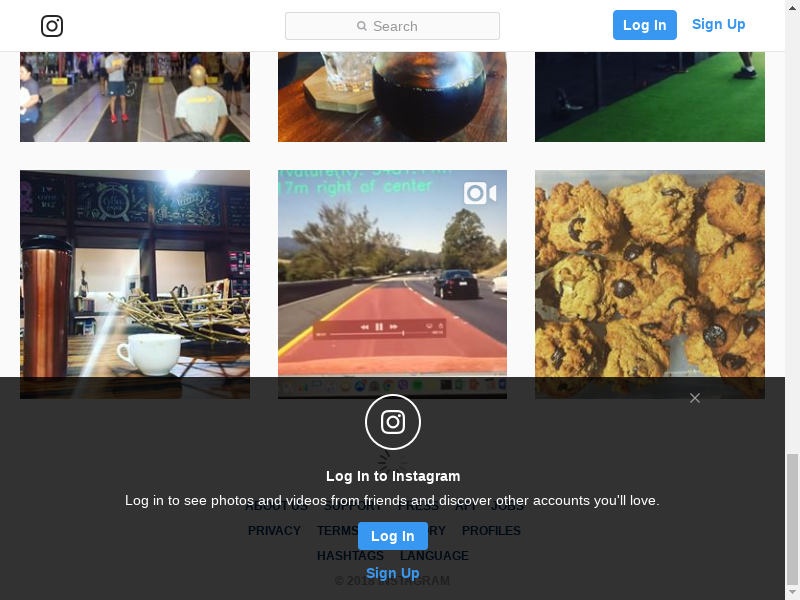

{"date_extracted": "2018-10-14 06:47:28.798894", "userid": "taylorswift", "posts": "236", "followers": "112m", "following": "0", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/81a760c38d68de3b17e5508270a63186/5C5C71BF/t51.2885-19/s150x150/20969376_112654676087652_1378856425261891584_a.jpg"}


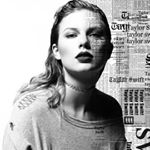

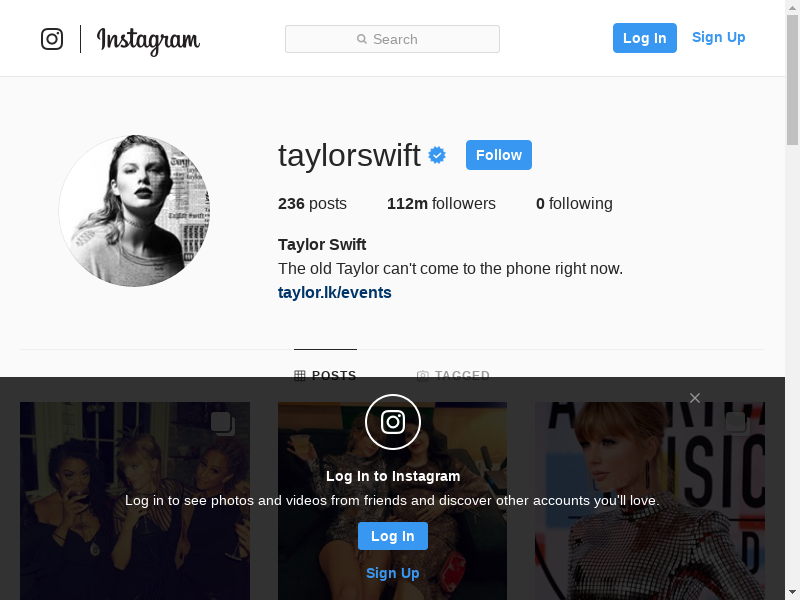

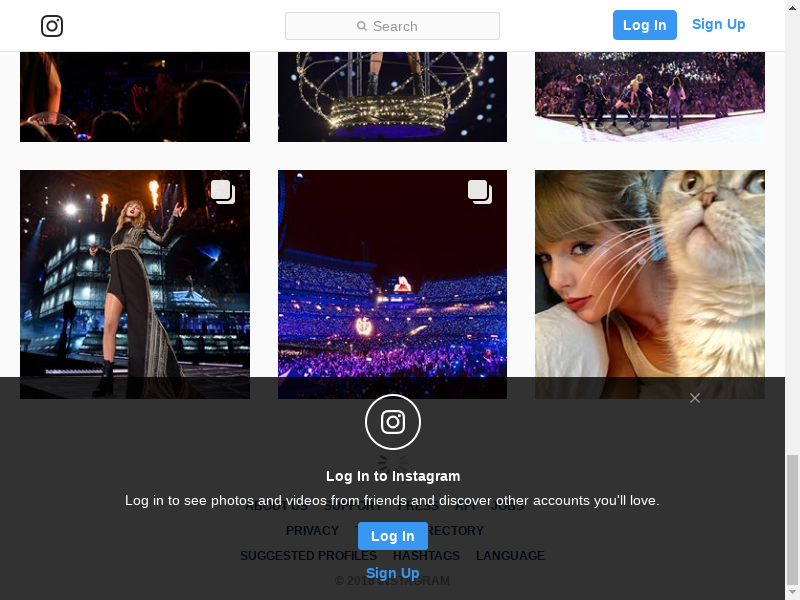

{"date_extracted": "2018-10-14 06:47:34.638707", "userid": "ilovebeirut", "posts": "4", "followers": "8", "following": "0", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/d445bb0b921925b7db4ee08f41260f39/5C4A660E/t51.2885-19/11887160_1479579122362485_153375665_a.jpg"}


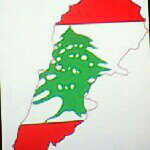

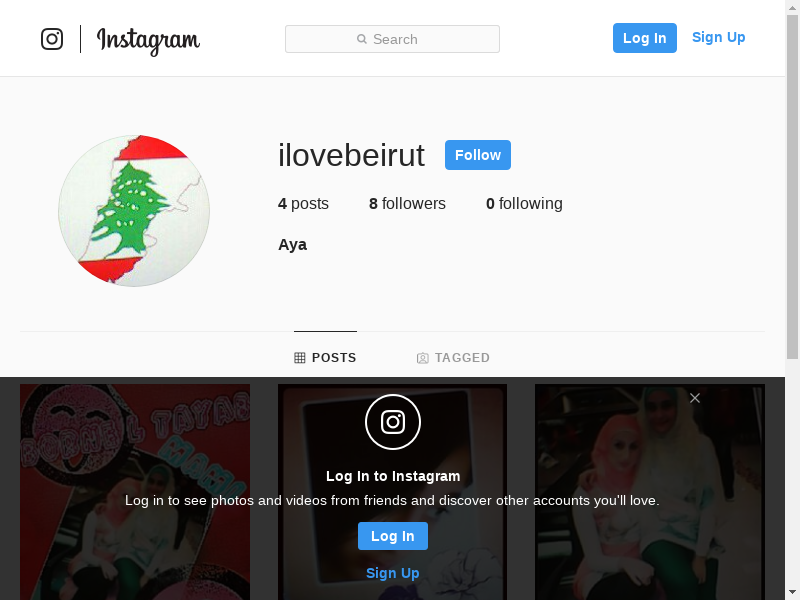

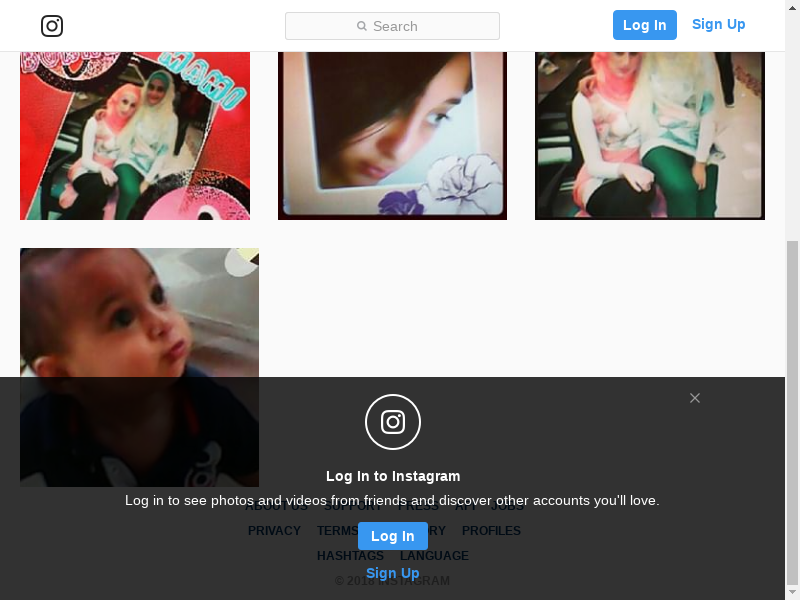

{"date_extracted": "2018-10-14 06:47:40.343709", "userid": "knockoutcrossfit", "posts": "1,375", "followers": "977", "following": "831", "profile_pic_uri": "https://scontent-hkg3-2.cdninstagram.com/vp/61636057c160db2b0646323ae711f724/5C44B0E4/t51.2885-19/11351823_614213478721449_1303633718_a.jpg"}


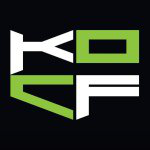

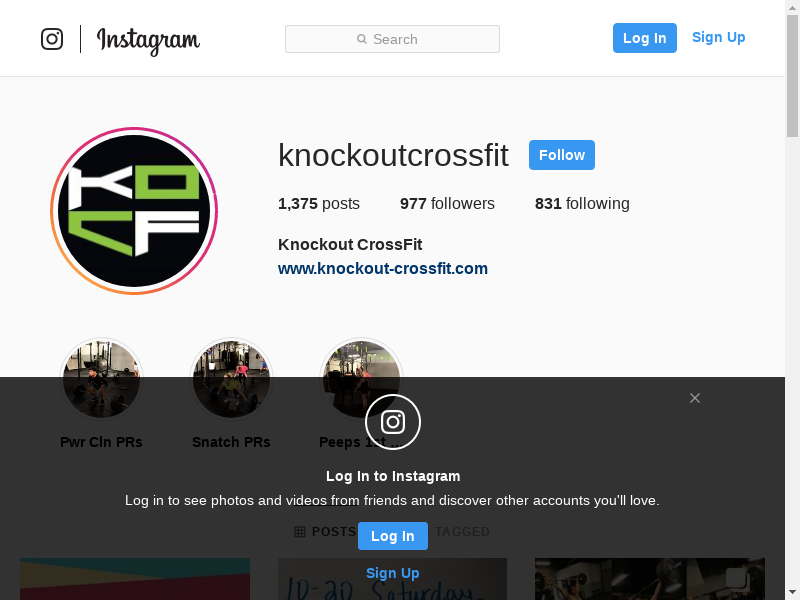

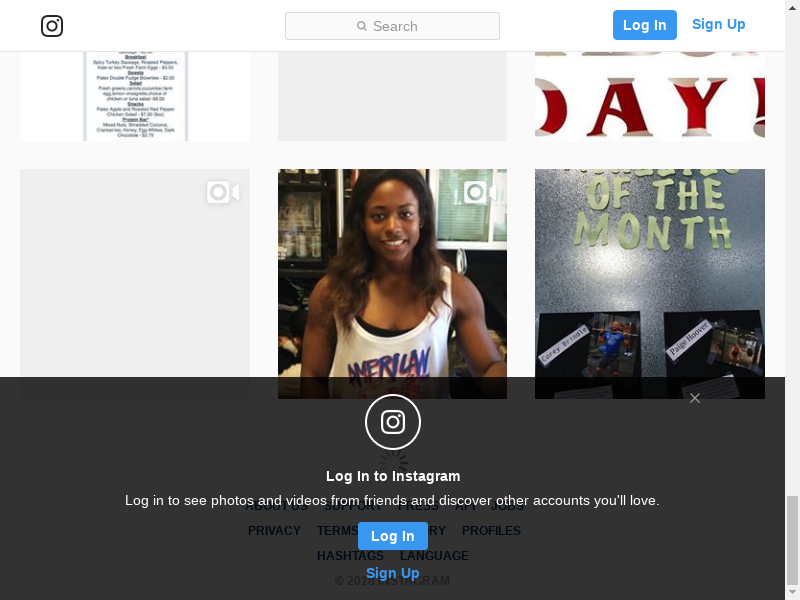

In [14]:
scrape_list(input_file='list_insta.csv')

In [18]:
query = datastore_client.query(kind='user_profile')
results = list(query.fetch())
results

[<Entity('user_profile', 5630742793027584) {'userid': 'knockoutcrossfit', 'followers': '977', 'posts': '1,375', 'date_extracted': '2018-10-14 06:47:40.343709', 'following': '831', 'profile_pic_uri': 'https://scontent-hkg3-2.cdninstagram.com/vp/61636057c160db2b0646323ae711f724/5C44B0E4/t51.2885-19/11351823_614213478721449_1303633718_a.jpg'}>,
 <Entity('user_profile', 5636953047302144) {'posts': '236', 'date_extracted': '2018-10-14 06:44:06.652343', 'following': '0', 'profile_pic_uri': 'https://scontent-hkg3-2.cdninstagram.com/vp/81a760c38d68de3b17e5508270a63186/5C5C71BF/t51.2885-19/s150x150/20969376_112654676087652_1378856425261891584_a.jpg', 'userid': 'taylorswift', 'followers': '112m'}>,
 <Entity('user_profile', 5641906755207168) {'date_extracted': '2018-10-12 10:36:42.950425', 'following': '0', 'profile_pic_uri': 'https://scontent-hkg3-2.cdninstagram.com/vp/81a760c38d68de3b17e5508270a63186/5C5C71BF/t51.2885-19/s150x150/20969376_112654676087652_1378856425261891584_a.jpg', 'userid': 't

In [ ]:
db_list(datastore_client=datastore_client)